In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from PIL import Image
from PIL import ImageFont
from os import listdir
from os.path import isfile, join
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from keras.utils import plot_model
import visualkeras

In [17]:
def get_images(folder):
    train_data=[]
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
        img=~img
        if img is not None:
            ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)

            ctrs,ret=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
            cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
            w=int(28)
            h=int(28)
            maxi=0
            for c in cnt:
                x,y,w,h=cv2.boundingRect(c)
                maxi=max(w*h,maxi)
                if maxi==w*h:
                    x_max=x
                    y_max=y
                    w_max=w
                    h_max=h
            im_crop= thresh[y_max:y_max+h_max+10, x_max:x_max+w_max+10]
            im_resize = cv2.resize(im_crop,(28,28))
            im_resize=np.reshape(im_resize,(784,1))
            train_data.append(im_resize)
    return train_data

In [18]:
data=[]
data=get_images("D:\\NINAD SUGANDHI\\GOOGLE COLAB\\LGM PROJECTS\\Handwritten Equation Solver\\extracted_images\\-")
len(data)
for i in range(0,len(data)):
    data[i]=np.append(data[i],['10'])
print(len(data))

33997


In [19]:
data0=[]
data0=get_images("D:\\NINAD SUGANDHI\\GOOGLE COLAB\\LGM PROJECTS\\Handwritten Equation Solver\\extracted_images\\0")
len(data0)
for i in range(0,len(data0)):
    data0[i]=np.append(data0[i],['10'])
print(len(data0))

6914


In [52]:
data1=[]
data1=get_images("D:\\NINAD SUGANDHI\\GOOGLE COLAB\\LGM PROJECTS\\Handwritten Equation Solver\\extracted_images\\1")
len(data1)
for i in range(0,len(data1)):
    data1[i]=np.append(data1[i],['10'])
print(len(data1))

26520


In [53]:
data2=[]
data2=get_images("D:\\NINAD SUGANDHI\\GOOGLE COLAB\\LGM PROJECTS\\Handwritten Equation Solver\\extracted_images\\2")
len(data2)
for i in range(0,len(data2)):
    data2[i]=np.append(data2[i],['10'])
print(len(data2))

26141


In [11]:
data_arrays = [data, data0, data1, data2]
df = pd.concat([pd.DataFrame(arr) for arr in data_arrays], ignore_index=True)
df.to_csv('D:\\NINAD SUGANDHI\\GOOGLE COLAB\\LGM PROJECTS\\train_equation_solver.csv',index=False)

In [29]:
data = pd.read_csv('D:\\NINAD SUGANDHI\\GOOGLE COLAB\\LGM PROJECTS\\train_equation_solver.csv', index_col = False)
data

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,10
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,10
2,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,10
3,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,10
4,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93567,17,77,249,178,178,178,178,178,178,178,...,0,0,0,0,0,0,0,0,0,10
93568,0,0,77,77,118,178,178,178,178,178,...,178,178,126,77,77,77,77,62,0,10
93569,214,214,214,214,214,214,214,214,214,214,...,0,0,0,0,0,0,0,0,0,10
93570,0,0,159,178,178,178,178,178,178,178,...,178,178,178,171,0,0,0,0,0,10


In [30]:
labels = data[['784']]

In [31]:
data.drop(data.columns[[784]],axis=1,inplace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
3,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
4,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0


In [32]:
data.shape

(93572, 784)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93572 entries, 0 to 93571
Columns: 784 entries, 0 to 783
dtypes: int64(784)
memory usage: 559.7 MB


In [34]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,93572.000000,93572.000000,93572.000000,93572.000000,93572.000000,93572.000000,93572.000000,93572.000000,93572.000000,93572.000000,...,93572.000000,93572.000000,93572.000000,93572.000000,93572.000000,93572.000000,93572.000000,93572.000000,93572.000000,93572.000000
mean,58.847668,54.658627,52.403198,53.018264,55.041337,57.748557,60.651188,62.442397,63.998183,63.995832,...,12.994988,11.453619,9.561300,8.227857,7.153390,5.825995,4.552409,3.464295,2.182480,0.806032
std,102.121565,94.830140,91.377314,92.899041,92.550303,93.630687,95.169652,95.012831,95.930119,95.732783,...,42.688102,39.915438,36.786905,34.397140,32.793579,29.282829,25.087644,22.321856,18.042146,9.748218
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,77.000000,68.000000,77.000000,68.000000,77.000000,102.000000,139.250000,145.000000,178.000000,178.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,231.000000


In [35]:
labels=np.array(labels)
labels

array([[10],
       [10],
       [10],
       ...,
       [10],
       [10],
       [10]], dtype=int64)

In [36]:
categorical_data=to_categorical(labels,num_classes=13)
categorical_data[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [37]:
data=data.to_numpy()
X_train = data.reshape(data.shape[0], 28, 28, 1)
X_train.shape

(93572, 28, 28, 1)

In [38]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28,1), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(13, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
#plot_model(model, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 15)        4335      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 15)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 6, 6, 15)          0         
                                                                 
 flatten (Flatten)           (None, 540)               0

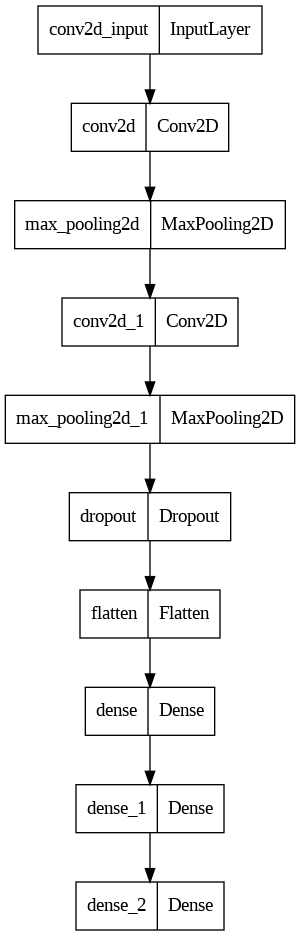

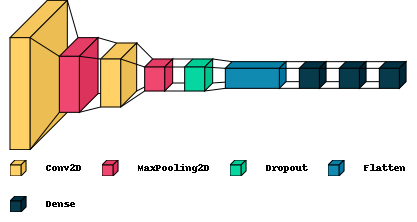

In [39]:
visualkeras.layered_view(model, legend = True, draw_volume = True, spacing = 20)

In [40]:
checkpoint_callback = ModelCheckpoint(
    filepath='D:\\NINAD SUGANDHI\\GOOGLE COLAB\\LGM PROJECTS\\Handwritten Equation Solver\\eqsolvermodel.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)

In [42]:
model.fit(X_train, categorical_data, epochs=5, batch_size=200,shuffle=True,verbose=1)

Epoch 1/5
468/468 [==============================] - 42s 90ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 2/5
468/468 [==============================] - 39s 84ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/5
468/468 [==============================] - 43s 93ms/step - loss: 1.2740e-12 - accuracy: 1.0000
Epoch 4/5
468/468 [==============================] - 43s 92ms/step - loss: 1.2740e-12 - accuracy: 1.0000
Epoch 5/5
468/468 [==============================] - 41s 87ms/step - loss: 1.2740e-12 - accuracy: 1.0000


[[72 72 72 ... 74 74 74]
 [72 72 72 ... 74 74 74]
 [72 72 72 ... 74 74 74]
 ...
 [68 68 66 ... 70 68 68]
 [68 68 66 ... 70 68 68]
 [68 68 68 ... 70 68 68]]


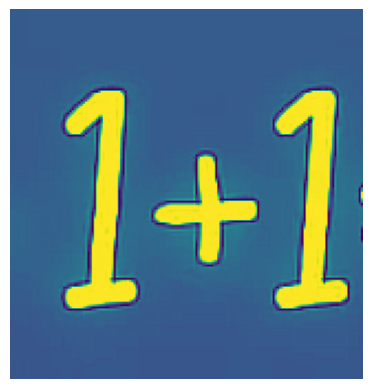

In [43]:
img = cv2.imread("D:\\NINAD SUGANDHI\\Pictures\\test.png",cv2.IMREAD_GRAYSCALE)
print(img)
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [44]:
if img is not None:
    img=~img
    ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ctrs,ret=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w=int(28)
    h=int(28)
    train_data=[]
    print(len(cnt))
    rects=[]
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)
    print(rects)
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    print(bool_rect)
    dump_rect=[]
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if(area1==min(area1,area2)):
                    dump_rect.append(rects[i])
    print(len(dump_rect)) 
    final_rect=[i for i in rects if i not in dump_rect]
    print(final_rect)
    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y:y+h+10,x:x+w+10]
        im_resize = cv2.resize(im_crop,(28,28))
        im_resize=np.reshape(im_resize,(28,28,1))
        train_data.append(im_resize)

28
[[0, 0, 160, 168], [24, 36, 35, 101], [32, 121, 3, 3], [33, 107, 3, 5], [37, 53, 3, 10], [39, 135, 8, 3], [47, 117, 6, 6], [51, 72, 3, 5], [51, 70, 3, 3], [52, 120, 3, 3], [64, 65, 49, 52], [72, 99, 8, 3], [72, 78, 13, 10], [82, 110, 3, 3], [82, 99, 3, 12], [96, 97, 3, 16], [96, 81, 3, 6], [117, 129, 3, 4], [119, 36, 35, 101], [128, 111, 3, 13], [132, 61, 3, 12], [133, 52, 3, 4], [135, 135, 5, 3], [142, 120, 6, 3], [143, 112, 3, 6], [146, 75, 3, 9], [147, 120, 3, 3], [147, 53, 3, 12]]
[[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [46]:
equation=''
for i in range(len(train_data)):
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)
    result=np.argmax(model.predict(train_data[i]), axis=-1)
    if(result[0]==10):
        equation = equation +'-'
    if(result[0]==11):
        equation = equation +'+'
    if(result[0]==12):
        equation = equation +'*'
    if(result[0]==0):
        equation = equation +'0'
    if(result[0]==1):
        equation = equation +'1'
    if(result[0]==2):
        equation = equation +'2'
    if(result[0]==3):
        equation = equation +'3'
    if(result[0]==4):
        equation = equation +'4'
    if(result[0]==5):
        equation = equation +'5'
    if(result[0]==6):
        equation = equation +'6'
    if(result[0]==7):
        equation = equation +'7'
    if(result[0]==8):
        equation = equation +'8'
    if(result[0]==9):
        equation = equation +'9'

1/1 [==============================] - 0s 51ms/step


In [51]:
print(equation)

1+1
